<a href="https://colab.research.google.com/github/muthvin/Predicting-application-failures/blob/main/Dissertion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libararies

In [1]:
import pandas as pd
import numpy as np
# from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Upload dataset

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Home.csv to Home.csv
User uploaded file "Home.csv" with length 107250 bytes


Create dataframe with uploaded dataset

In [4]:
df_home = pd.read_csv('Home.csv')

In [5]:
df_home.head()

,Page,Bytes_Sent,Bytes_Received,Throughput,Response_time,No_of_logic,DB_Call,Category
0,Home,415,72,36,23.0,0,0,0
1,Home,428,76,78,20.0,0,0,1
2,Home,416,77,93,22.0,0,0,0
3,Home,425,74,83,38.0,0,0,1
4,Home,422,72,50,36.0,0,0,0


In [6]:
df_home.shape

(4129, 8)

Data Preprocessing for categorical columns

In [9]:
# Creating dummy variables:
df_page = pd.get_dummies(df_home, columns=['Page'])
df_page.head()

,Bytes_Sent,Bytes_Received,Throughput,Response_time,No_of_logic,DB_Call,Category,Page_Home,Page_View1,Page_View2,Page_View3,Page_View4,Page_View5
0,415,72,36,23.0,0,0,0,1,0,0,0,0,0
1,428,76,78,20.0,0,0,1,1,0,0,0,0,0
2,416,77,93,22.0,0,0,0,1,0,0,0,0,0
3,425,74,83,38.0,0,0,1,1,0,0,0,0,0
4,422,72,50,36.0,0,0,0,1,0,0,0,0,0


In [10]:
df_page.shape

(4129, 13)

#Exploratory Data Analysis

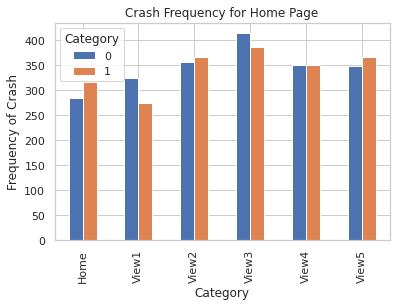

In [11]:
%matplotlib inline
pd.crosstab(df_home.Page,df_home.Category).plot(kind='bar')
plt.title('Crash Frequency for Home Page')
plt.xlabel('Category')
plt.ylabel('Frequency of Crash')
plt.savefig('Crash_Freq')

In [ ]:
# sns.pairplot(df_home)

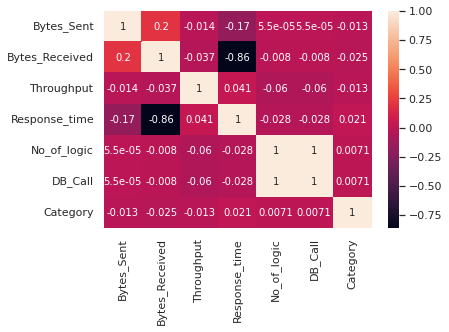

In [12]:
sns.heatmap(df_home.corr(), annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


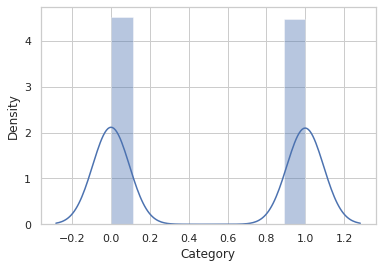

In [13]:
sns.distplot(df_home['Category'])

Split data into train and test

In [14]:
# Split the data into training and testing
X = df_page.drop(['Category'], axis=1)
y = df_page['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
X_train.shape, X_test.shape

((3303, 12), (826, 12))

In [17]:
y_train.shape, y_test.shape

((3303,), (826,))

In [16]:
X_train.head()

,Bytes_Sent,Bytes_Received,Throughput,Response_time,No_of_logic,DB_Call,Page_Home,Page_View1,Page_View2,Page_View3,Page_View4,Page_View5
180,426,78,80,36.0,0,0,1,0,0,0,0,0
3239,421,645,98,4.0,0,0,0,0,0,0,1,0
38,420,77,52,27.0,0,0,1,0,0,0,0,0
372,422,73,91,35.0,0,0,1,0,0,0,0,0
2754,418,675,42,7.0,0,0,0,0,0,0,1,0


In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Classifier1: LogisticsRegression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Logistics Regression Model Evaluation

In [34]:
# Predicting the Test set results
y_pred = lr.predict(X_test)

Text(89.18, 0.5, 'Actual label')

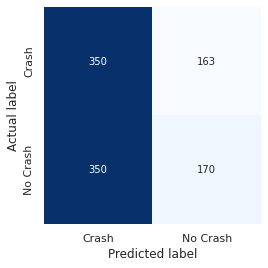

In [35]:
# y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_pred)
labels = ['Crash', 'No Crash']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

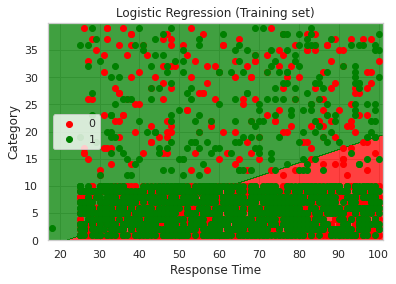

In [26]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X = df_home.iloc[:, [3,4]].values
y = df_home.iloc[:, 7].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

lr.fit(X, y)
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Response Time')
plt.ylabel('Category')
plt.legend()
plt.show()

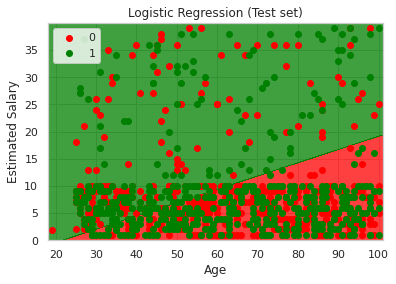

In [25]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap

X = df_home.iloc[:, [3,4]].values
y = df_home.iloc[:, 7].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# X_set, y_set = X, y

lr.fit(X, y)
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Response Time')
plt.ylabel('Category')
plt.legend()
plt.show()

#Classifier2: Decision Tree model

In [29]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [36]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


Text(89.18, 0.5, 'Actual label')

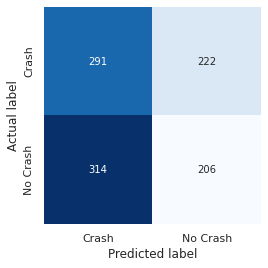

In [37]:
# y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_pred)
labels = ['Crash', 'No Crash']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

#Classifier3: NB model

In [194]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)



Text(89.18, 0.5, 'Actual label')

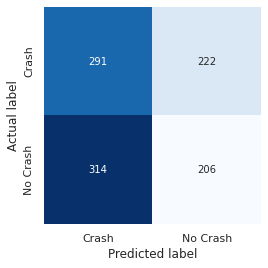

In [38]:
# y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_pred)
labels = ['Crash', 'No Crash']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

#Classifier4: Deep Learning Model

In [39]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

# X = df_home.iloc[:, [3,4]].values
# y = df_home.iloc[:, 7].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

model = Sequential()

# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(10, input_shape = (2,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) 

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size = 5, epochs = 10, verbose = 1)

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/10
620/620 [==============================] - 3s 3ms/step - loss: 7.6527 - accuracy: 0.5039 - val_loss: 7.7647 - val_accuracy: 0.4966
Epoch 2/10
620/620 [==============================] - 2s 3ms/step - loss: 7.6527 - accuracy: 0.5039 - val_loss: 7.7647 - val_accuracy: 0.4966
Epoch 3/10
620/620 [==============================] - 2s 3ms/step - loss: 7.6527 - accuracy: 0.5039 - val_loss: 7.7647 - val_accuracy: 0.4966
Epoch 4/10
620/620 [==============================] - 2s 3ms/step - loss: 7.6527 - accuracy: 0.5039 - val_loss: 7.7647 - val_accuracy: 0.4966
Epoch 5/10
620/620 [==============================] - 1s 2ms/step - loss: 7.6527 - accuracy: 0.5039 - val_loss: 7.7647 - val_accuracy: 0.4966
Epoch 6/10
620/620 [==============================] - 1s 2ms/step - loss: 7.6527 - accuracy: 0.5039 - val_loss: 7.7647 - val_accuracy: 0.4966
Epoch 7/10
620/620 [==============================] - 1s 2ms/step - loss: 7.6527 - accuracy: 0.5039 - val_loss: 7.7647 - val_accuracy: 0.4966
Epoch 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

[]

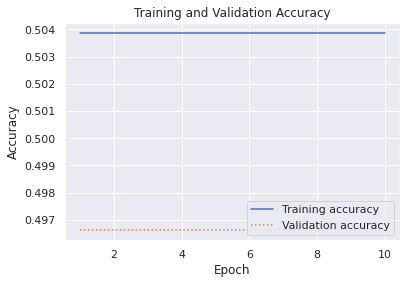

In [40]:
model.summary()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()